In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = pd.read_csv(path)
df.head()

,V1,V2,V3,V4,V5,VP
0,2.0,-29.0,-28.0,-32.0,-27.0,0.0
1,9.0,17.0,18.0,21.0,27.0,-2.0
2,-13.0,-6.0,4.0,8.0,-1.0,-8.0
3,4.0,-9.0,-22.0,-21.0,-10.0,-10.0
4,12.0,15.0,22.0,14.0,6.0,6.0


In [26]:
def create_feature_target_dataframe(df, column):
    values = df[column].values
    
    # Initialize lists to store the feature rows and targets
    features = []
    targets = []
    columns = []

    window_size = 3

    # Loop through the values, taking 5 values as features and the 6th as the target
    for i in range(len(values) - window_size):
        feature_row = values[i:i+window_size]
        target = values[i+window_size]
        
        # Append the feature row and target to the respective lists
        features.append(feature_row)
        targets.append(target)

    for i in range(window_size):
        col = f"x{i+1}"
        columns.append(col)
        
    # Create a new DataFrame from the feature rows and targets
    new_df = pd.DataFrame(features, columns=columns)
    new_df['target'] = targets
    
    return new_df

In [27]:
v1_df = create_feature_target_dataframe(df, column='V2')
v1_df.head()

,x1,x2,x3,target
0,-29.0,17.0,-6.0,-9.0
1,17.0,-6.0,-9.0,15.0
2,-6.0,-9.0,15.0,-2.0
3,-9.0,15.0,-2.0,-5.0
4,15.0,-2.0,-5.0,-4.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = v1_df.drop('target',axis=1)
y = v1_df['target']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y, 
    test_size=0.2,
    shuffle=False
)

In [31]:
x_train.shape,x_test.shape

((1996, 3), (500, 3))

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout, Normalization,Bidirectional
from tensorflow.keras.layers import TimeDistributed, Conv1D,MaxPool1D,Flatten
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [33]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [34]:
x_train.shape

(1996, 3)

In [35]:
# Reshape the data for LSTM [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [36]:
x_train.shape, x_test.shape

((1996, 1, 3), (500, 1, 3))

In [37]:
# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(50, activation='tanh')))

model.add(Dropout(0.1))
model.add(Dense(100))
model.add(Dense(1))

# Define the optimizer with a specific learning rate
learning_rate = 0.00003
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Display the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=100, batch_size=10, 
                    validation_data=(x_test, y_test), 
                    shuffle=False)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 191.8150 - val_loss: 258.4840
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 171.6936 - val_loss: 230.4039
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 148.3891 - val_loss: 192.1517
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 130.8574 - val_loss: 173.9764
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 121.4674 - val_loss: 166.2093
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 116.4395 - val_loss: 162.9353
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 114.8921 - val_loss: 161.7377
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 113.9350 - val_loss: 161.1946
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 114.1608 - val_loss: 160.7462
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 112.0702 - val_loss: 160.8033
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 111.9416 - val_l

KeyboardInterrupt: 

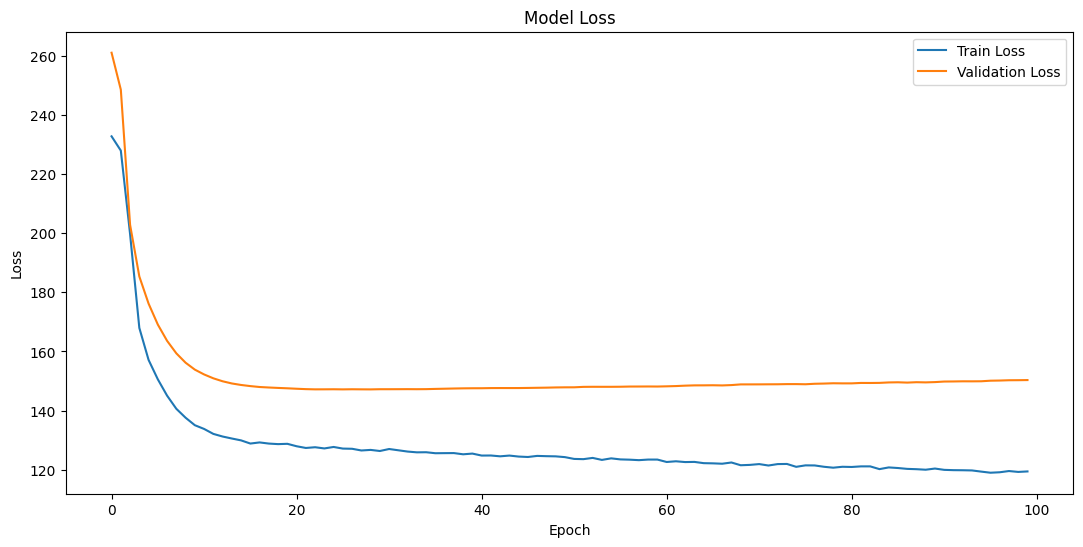

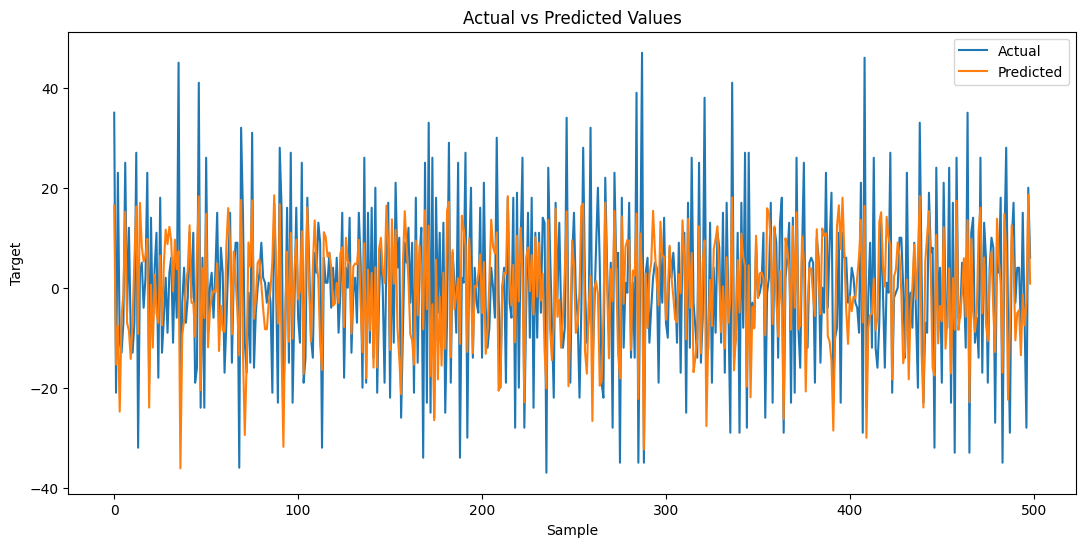

In [19]:
plt.figure(figsize=(13,6))
# Make predictions
y_pred = model.predict(x_test, verbose=0)
y_test = np.array(y_test)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the actual vs predicted values
plt.figure(figsize=(13,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()
plt.show()